<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/airways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 0.0 Reset memory when repeating experiment
%reset -f

In [4]:
# 0.1 Print output of mulitple commands in a cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Call libraries

In [5]:
# 1.0 Install libraries
!pip install catboost -q
!pip install category_encoders -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [6]:
#1.1  Data preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#1.2 Split data into X_train/X_test
from sklearn.model_selection import train_test_split

#1.3 For cross-validation and stratified k-fold partitions
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

#1.4 Encoders
import category_encoders as ce

#1.5 For plotting
import matplotlib.pyplot as plt
import seaborn as sns

#1.6 Classifiers
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

#1.7 Classification reports
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


In [7]:
#1.8 Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Connect to google drive
And read/examine data

In [9]:
# 2.0 Mount my google drive at /gdrive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


### Read and examine data

In [10]:
# 2.1 Read data from google drive
df=pd.read_csv('/gdrive/MyDrive/Colab_data_files/drHarshVardhan/airways_mod_ver4.csv')
df.head()
df.describe()
df.info()

,age,sex,height,subluxation of mandible,head and neck movement,buck teeth,edentulous,bmi,sternomental distance,thyromental distance,mallampatti,mouth opening,cormack lahane
0,22,male,172,1,0,1,0.0,22.40,17.0,8.6,2,0,2
1,55,female,143,1,0,1,0.0,27.45,16.0,7.8,2,0,1
2,59,male,162,2,1,0,1.0,24.20,14.3,6.9,3,0,3
3,48,female,168,1,0,0,0.0,28.50,15.6,7.2,3,0,2
4,51,female,154,3,0,0,1.0,25.30,14.3,6.7,4,1,4


,age,height,subluxation of mandible,head and neck movement,buck teeth,edentulous,bmi,sternomental distance,thyromental distance,mallampatti,mouth opening,cormack lahane
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,998.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,43.498000,163.035000,0.206000,0.104000,0.259000,0.173347,23.895350,16.935400,8.101800,1.9100,0.010000,1.826000
std,11.742823,11.470804,0.491738,0.305413,0.440583,0.378737,3.869877,1.592276,0.919566,0.6902,0.099549,0.714307
min,20.000000,132.000000,0.000000,0.000000,0.000000,0.000000,13.800000,12.500000,5.600000,1.0000,0.000000,1.000000
25%,34.000000,155.000000,0.000000,0.000000,0.000000,0.000000,21.400000,16.000000,7.500000,1.0000,0.000000,1.000000
50%,45.000000,163.000000,0.000000,0.000000,0.000000,0.000000,24.000000,17.000000,8.000000,2.0000,0.000000,2.000000
75%,54.000000,171.000000,0.000000,0.000000,1.000000,0.000000,26.525000,18.000000,8.600000,2.0000,0.000000,2.000000
max,64.000000,195.000000,3.000000,1.000000,2.000000,1.000000,37.000000,22.000000,11.000000,4.0000,1.000000,4.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1000 non-null   int64  
 1   sex                      1000 non-null   object 
 2   height                   1000 non-null   int64  
 3   subluxation of mandible  1000 non-null   int64  
 4   head and neck movement   1000 non-null   int64  
 5   buck teeth               1000 non-null   int64  
 6   edentulous               998 non-null    float64
 7   bmi                      1000 non-null   float64
 8   sternomental distance    1000 non-null   float64
 9   thyromental distance     1000 non-null   float64
 10  mallampatti              1000 non-null   int64  
 11  mouth opening            1000 non-null   int64  
 12  cormack lahane           1000 non-null   int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 101.7+ KB


### Streamline column names

In [11]:
#2.2 Remove leading/trailing spaces from col names
df.columns = df.columns.str.strip()
# Within a col name keep single space
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)  # Replaces multiple spaces with a single space
df.head()

,age,sex,height,subluxation of mandible,head and neck movement,buck teeth,edentulous,bmi,sternomental distance,thyromental distance,mallampatti,mouth opening,cormack lahane
0,22,male,172,1,0,1,0.0,22.40,17.0,8.6,2,0,2
1,55,female,143,1,0,1,0.0,27.45,16.0,7.8,2,0,1
2,59,male,162,2,1,0,1.0,24.20,14.3,6.9,3,0,3
3,48,female,168,1,0,0,0.0,28.50,15.6,7.2,3,0,2
4,51,female,154,3,0,0,1.0,25.30,14.3,6.7,4,1,4


### Drop NA rows

In [12]:
# 2.3
df.isna().sum()
# We have only two rows where edentulous is null.
df = df.dropna()
# Change the type of 'edentulous' from float64 to int64
df['edentulous'] = df['edentulous'].astype('int64')
df.dtypes

,0
age,0
sex,0
height,0
subluxation of mandible,0
head and neck movement,0
buck teeth,0
edentulous,2
bmi,0
sternomental distance,0
thyromental distance,0


,0
age,int64
sex,object
height,int64
subluxation of mandible,int64
head and neck movement,int64
buck teeth,int64
edentulous,int64
bmi,float64
sternomental distance,float64
thyromental distance,float64


In [13]:
#2.4 Map 'male' and 'female' to 1 and 0

df['sex'].value_counts()

mappings = {
            'female': 0,
            'male': 1
           }

df['sex'] = df['sex'].map(mappings)

df['sex'].value_counts()


,count
sex,
female,533
male,465


,count
sex,
0,533
1,465


In [14]:
#2.5 Our cat features and num features:
#    (Exclude cormack lahane)

cat_features = ['sex', 'buck teeth', 'edentulous', 'mallampatti', 'mouth opening', 'subluxation of mandible', 'head and neck movement']
num_features = ["age", "height", "bmi", "sternomental distance", "thyromental distance"]

In [15]:
#2.6 Number of unique values in our cat features:

df[cat_features].nunique()


,0
sex,2
buck teeth,3
edentulous,2
mallampatti,4
mouth opening,2
subluxation of mandible,4
head and neck movement,2


In [16]:
#2.7 Convert all cat-columns to 'int16' dtype
for col in cat_features:
    df[col] = df[col].astype('int16')

# Display the updated data types
df[cat_features].dtypes


,0
sex,int16
buck teeth,int16
edentulous,int16
mallampatti,int16
mouth opening,int16
subluxation of mandible,int16
head and neck movement,int16


In [17]:
#2.8 Distribution of target values
# Are classes balanced?
# (1 is mapped to 0, 2 to 1, 3 to 2 and 4 to 3:)

df['cormack lahane'].value_counts()

,count
cormack lahane,
2,557
1,324
3,84
4,33


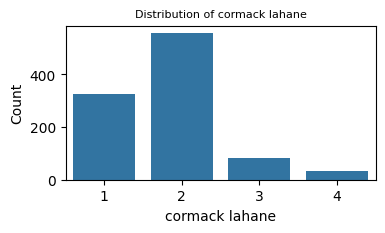

In [18]:
#2.9 Distribution of categories in cormack lahane:
_=plt.figure(figsize=(4, 2))
_=sns.countplot(x='cormack lahane', data=df)
_=plt.title('Distribution of cormack lahane', fontsize = 8)
_=plt.xlabel('cormack lahane')
_=plt.ylabel('Count')
_=plt.show()

## Feature engineering
(Experimental)

In [ ]:
encoder = ce.CatBoostEncoder(cols=["sex", "edentulous", "mouth opening", "head and neck movement"])
encoder.fit(X, y)
X_catEncoded = encoder.transform(X)

CatBoostEncoder(cols=['sex', 'edentulous', 'mouth opening',
                      'head and neck movement'])

In [ ]:
X_catEncoded.head()

,age,sex,height,subluxation of mandible,head and neck movement,buck teeth,edentulous,bmi,sternomental distance,thyromental distance,mallampatti,mouth opening
0,22,0.821514,172,1,0.765168,1,0.785503,22.40,17.0,8.6,2,0.815799
1,55,0.829262,143,1,0.765168,1,0.785503,27.45,16.0,7.8,2,0.815799
2,59,0.821514,162,2,1.341197,0,1.016239,24.20,14.3,6.9,3,0.815799
3,48,0.829262,168,1,0.765168,0,0.785503,28.50,15.6,7.2,3,0.815799
4,51,0.829262,154,3,0.765168,0,1.016239,25.30,14.3,6.7,4,1.711423


In [ ]:
df['bmi'].min()
df['bmi'].max()
(df['bmi'].max() - df['bmi'].min())/4


13.8

37.0

5.8

In [ ]:
df['height'].min()
df['height'].max()
(df['height'].max() - df['height'].min())/4


132

195

15.75

In [ ]:
bmi_cat = pd.cut(df["bmi"],
       bins=[13, 19, 25, 31, 38],
       labels=["0", "1", "2", "3"])

In [ ]:
height_cat = pd.cut(df["height"],
       bins=[130, 146, 162, 178, 195],
       labels=["0", "1", "2", "3"])

In [ ]:
bmi_cat = pd.DataFrame(bmi_cat)
bmi_cat.head()

,bmi
0,1
1,2
2,1
3,2
4,2


In [ ]:
height_cat = pd.DataFrame(height_cat)
height_cat.head()

,height
0,2
1,0
2,1
3,2
4,1


In [ ]:
bmi_cat.rename(columns = {'bmi':'bmi_cat'}, inplace = True)
bmi_cat.head()

,bmi_cat
0,1
1,2
2,1
3,2
4,2


In [ ]:
height_cat.rename(columns = {'height':'height_cat'}, inplace = True)
height_cat.head()

,height_cat
0,2
1,0
2,1
3,2
4,1


In [ ]:
df['bmi_cat'] = bmi_cat

In [ ]:
df['height_cat'] = height_cat

In [ ]:
df.head()

,age,sex,height,subluxation of mandible,head and neck movement,buck teeth,edentulous,bmi,sternomental distance,thyromental distance,mallampatti,mouth opening,cormack lahane,bmi_cat,height_cat
0,22,1,172,1,0,1,0.0,22.40,17.0,8.6,2,0,1,1,2
1,55,0,143,1,0,1,0.0,27.45,16.0,7.8,2,0,0,2,0
2,59,1,162,2,1,0,1.0,24.20,14.3,6.9,3,0,2,1,1
3,48,0,168,1,0,0,0.0,28.50,15.6,7.2,3,0,1,2,2
4,51,0,154,3,0,0,1.0,25.30,14.3,6.7,4,1,3,2,1


In [ ]:
dfc = df.copy()
y = dfc.pop('cormack lahane')
X = dfc




## Visulaizing data
And discovering relationships

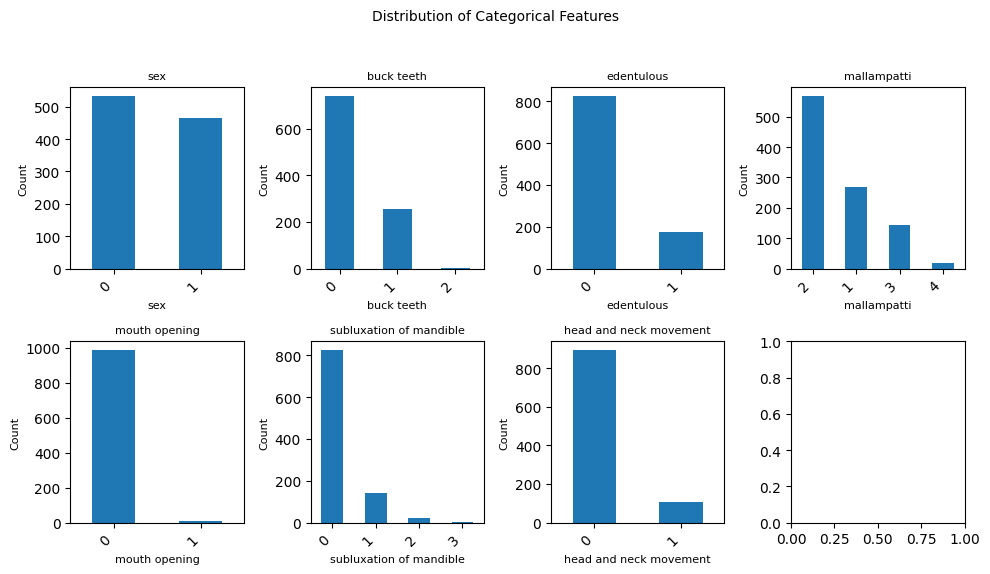

In [20]:
# prompt: Plot distributions of all features of df_cat in 2 X 4 matrix. Plot graph titles in fontsize of 8 and axis labels also in fontsize of 8. Give overall title as Distribution of Categorical Features

# Assuming df_cat is already defined as in the provided code

fig, axes = plt.subplots(2, 4, figsize=(10, 6))
_=fig.suptitle('Distribution of Categorical Features', fontsize=10)

for i, col in enumerate(cat_features):
    ax = axes[i // 4, i % 4]
    _=df[col].value_counts().plot(kind='bar', ax=ax)
    _=ax.set_title(col, fontsize=8)
    _=ax.set_xlabel(col, fontsize=8)
    _=ax.set_ylabel('Count', fontsize=8)
    _=plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

_=plt.tight_layout(rect=[0, 0.03, 1, 0.95])
_=plt.show()


Observations:     



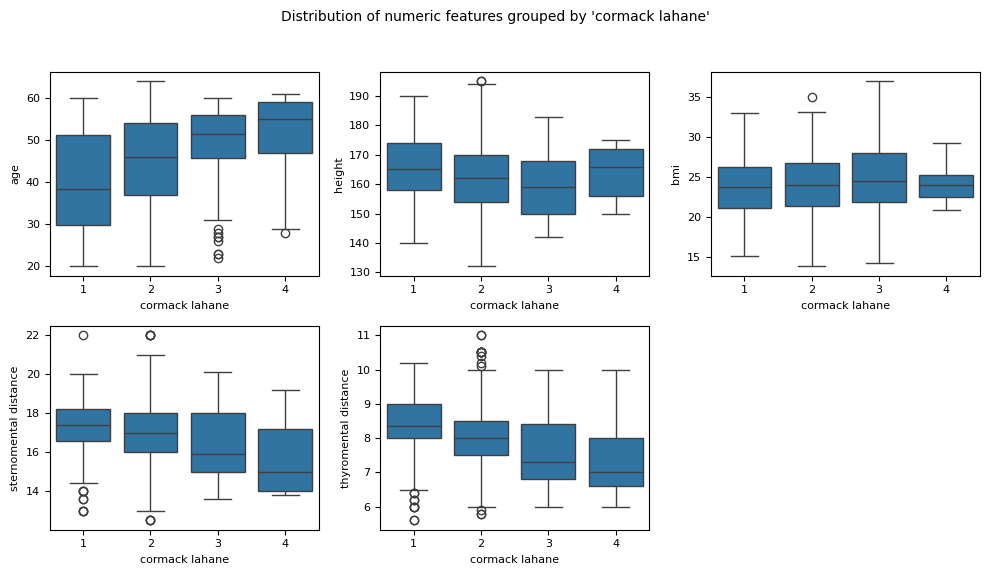

In [22]:
# prompt: Consider the dataframe df. Draw box plots of all numeric features grouped by 'cormack lahane'. Plot them in a matrix of 2 X 3.. Keep the fontsize of labels to 8. Keep overall title as distribution of numeric features grouped by  'cormack lahane'. Delete the last unused axes


fig, axes = plt.subplots(2, 3, figsize=(10, 6))
_=fig.suptitle("Distribution of numeric features grouped by 'cormack lahane'", fontsize=10)

for i, col in enumerate(num_features):
    ax = axes[i // 3, i % 3]
    _=sns.boxplot(x='cormack lahane', y=col, data=df, ax=ax)
    _=ax.set_xlabel('cormack lahane', fontsize=8)
    _=ax.set_ylabel(col, fontsize=8)
    _=ax.tick_params(axis='x', labelsize=8)
    _=ax.tick_params(axis='y', labelsize=8)


# Delete the last unused axes if necessary (adjust the index based on the number of numeric features)
if len(df[num_features].columns) < 6:
    for i in range(len(df[num_features].columns), 6):
      _=axes.flatten()[i].set_visible(False)


_=plt.tight_layout(rect=[0, 0.03, 1, 0.95])
_=plt.show()


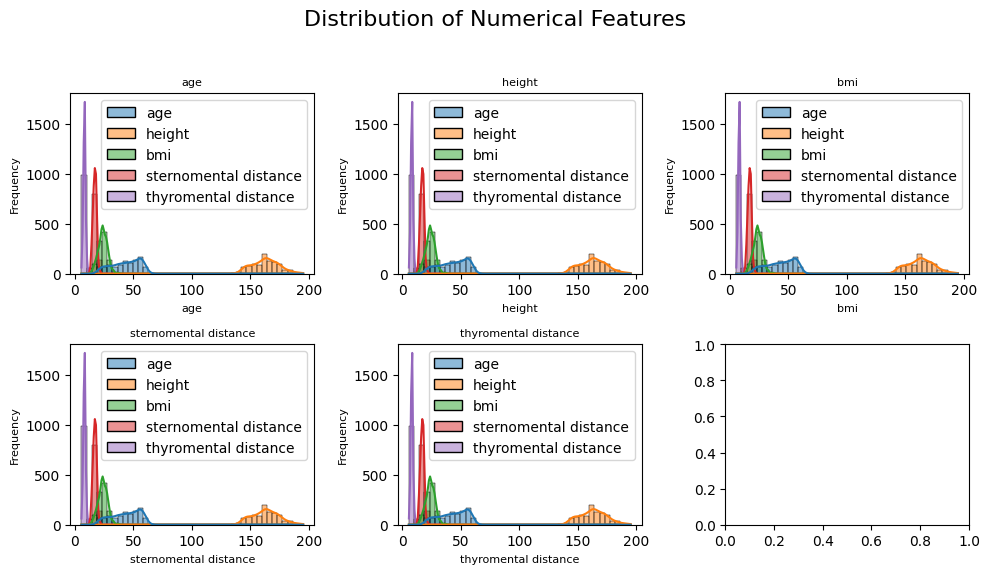

In [23]:
# prompt: Plot distribution of all features of df_num. But do not show the last  plot ie the sixth with no data ie do not show even its axis

import matplotlib.pyplot as plt
# Assuming df_num is already defined as in the provided code

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
_=fig.suptitle('Distribution of Numerical Features', fontsize=16)

for i, col in enumerate(num_features):
    if i < 5:  # Skip the sixth plot
        ax = axes[i // 3, i % 3]
        _=sns.histplot(df[num_features], ax=ax, kde=True) # Use histplot for better visualization
        _=ax.set_title(col, fontsize=8)
        _=ax.set_xlabel(col, fontsize=8)
        _=ax.set_ylabel('Frequency', fontsize=8)
    elif i==5:
        ax = axes[-1,-1]
        #ax = axes[i // 3, i % 3]
        #ax.axes.set_visible(False)
        ax.axis('off') # Hide the axis of the sixth plot
        ax.axes.flatten()[i].set_visible(False)



_=plt.tight_layout(rect=[0, 0.03, 1, 0.95])
_=plt.show()


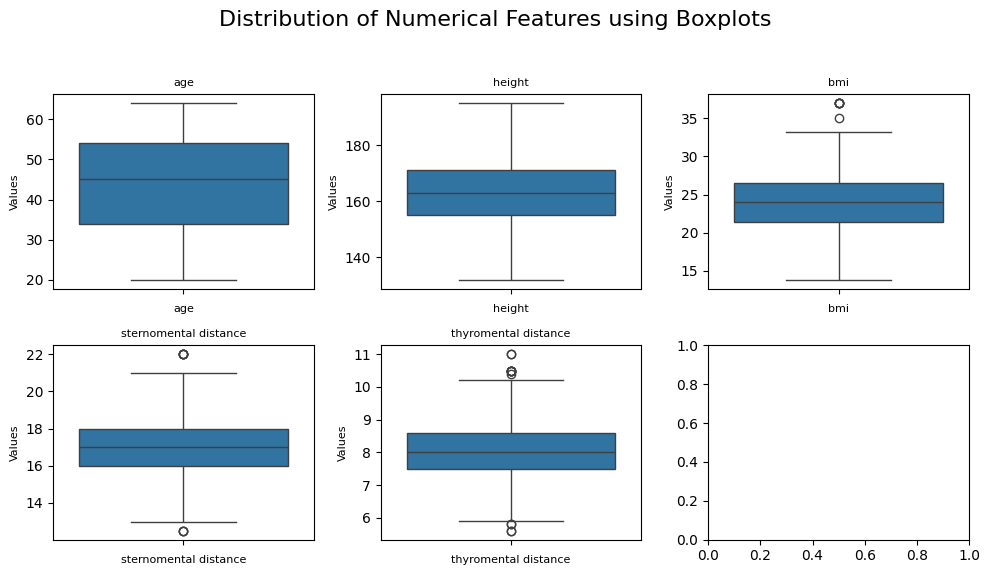

In [ ]:
# prompt: Plot distribution of all features of df_num using boxplots.

## Are there are outliers?

import matplotlib.pyplot as plt
# Assuming df_num is already defined as in the provided code

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
_=fig.suptitle('Distribution of Numerical Features using Boxplots', fontsize=16)

for i, col in enumerate(df_num.columns):
    if i < 5:  # Skip the sixth plot
        ax = axes[i // 3, i % 3]
        _=sns.boxplot(y=df_num[col], ax=ax) # Use boxplot for distribution
        _=ax.set_title(col, fontsize=8)
        _=ax.set_xlabel(col, fontsize=8)
        _=ax.set_ylabel('Values', fontsize=8)
    elif i==5:
        ax = axes[-1,-1]
        ax.axes.set_visible(False)
        ax.axis('off') # Hide the axis of the sixth plot

_=plt.tight_layout(rect=[0, 0.03, 1, 0.95])
_=plt.show()


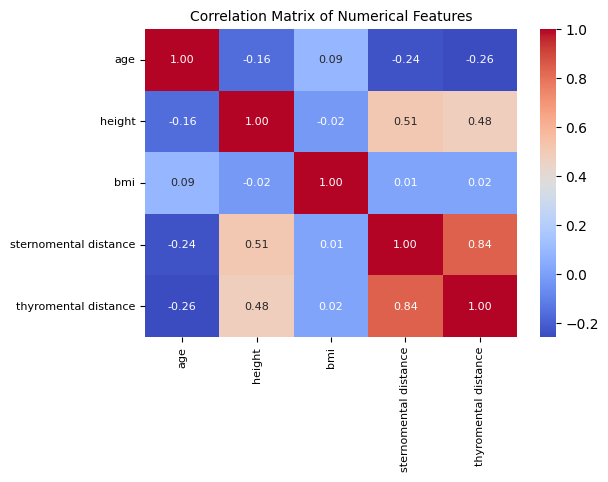

In [25]:
# prompt: Write a program to visualize the correlation in df_num features and keep fontsize of labels be 8

_=plt.figure(figsize=(6, 4))
_=sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 8})
_=plt.title('Correlation Matrix of Numerical Features', fontsize=10)
_=plt.xticks(fontsize=8)
_=plt.yticks(fontsize=8)
_=plt.show()


<Axes: xlabel='sternomental distance', ylabel='age'>

<Axes: xlabel='sternomental distance', ylabel='age'>

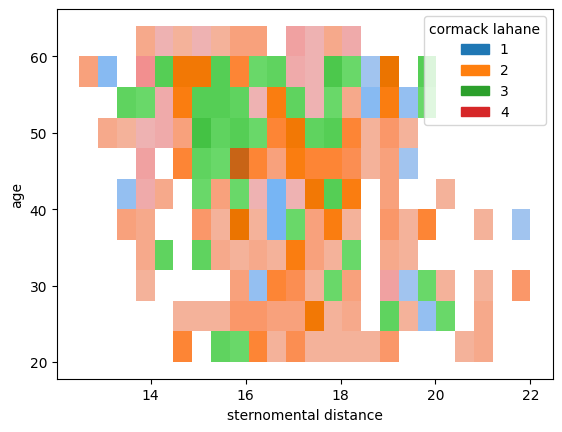

In [ ]:
sns.histplot(df_num, x="sternomental distance", y="age")
sns.histplot(df, x="sternomental distance", y="age", hue = 'cormack lahane')


In [ ]:
sum(df['thyromental distance'].notna() > 60)

0

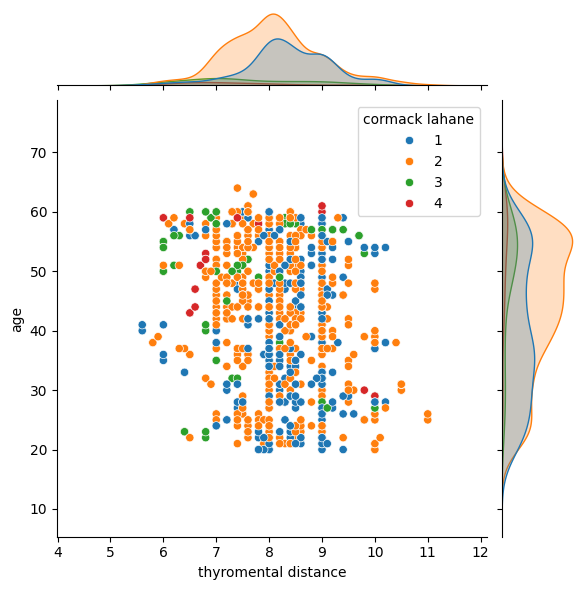

In [ ]:
dx = df[df['thyromental distance'] < 60]
sns.jointplot(data=dx, x="thyromental distance", y="age", hue = 'cormack lahane')

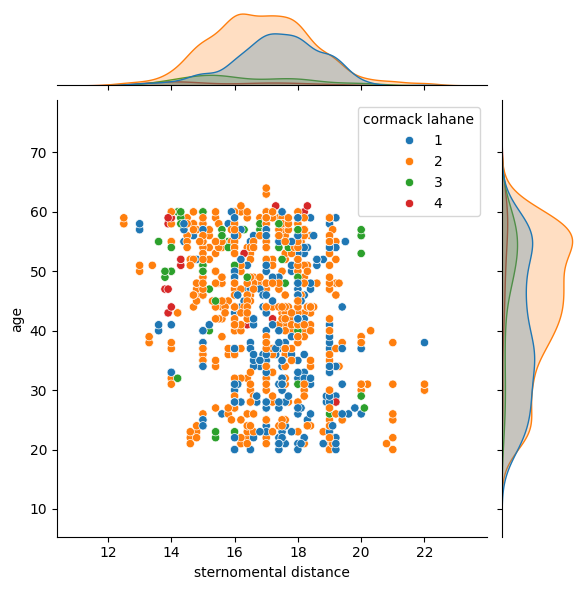

In [ ]:
sns.jointplot(data=df, x="sternomental distance", y="age", hue = 'cormack lahane', palette= "tab10")

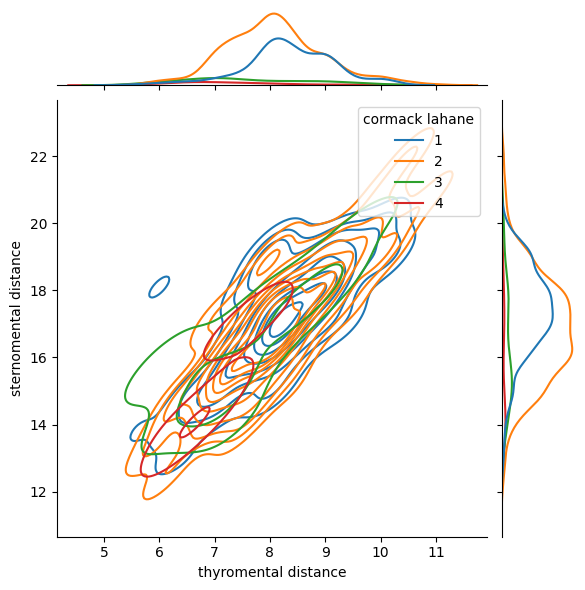

In [ ]:
dx = df[df['thyromental distance'] < 60]
ax = sns.jointplot(data=dx, x="thyromental distance",
              y="sternomental distance",
              hue = 'cormack lahane',
              kind = "kde",
              palette= "tab10")




In [ ]:
"""
# 1.3. Missing Data Treatment--amended

# 1.3.1 Impite Missing Categorical Data [Nominal | Ordinal] using Descriptive Statistics : Central Tendance (Mode)

# Dataset Used : df_cat_mde

si_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
si_cat_transformed = si_cat.fit_transform(df_cat)
df_cat = pd.DataFrame(si_cat_transformed, columns=df_cat.columns)
df_cat.head()
"""

"\n# 1.3. Missing Data Treatment--amended\n\n# 1.3.1 Impite Missing Categorical Data [Nominal | Ordinal] using Descriptive Statistics : Central Tendance (Mode)\n\n# Dataset Used : df_cat_mde\n\nsi_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')\nsi_cat_transformed = si_cat.fit_transform(df_cat)\ndf_cat = pd.DataFrame(si_cat_transformed, columns=df_cat.columns)\ndf_cat.head()\n"

In [ ]:
"""
from sklearn.impute import SimpleImputer

# 1.3.2.1 Impute missing Non-categorical data using descriptive statistical: central tendency
# Dataset used: df_noncat_mde

# Create a SimpleImputer with the 'most_frequent' strategy
si_noncat = SimpleImputer(missing_values=np.nan, strategy='median')

# Fit and transform the data
si_noncat_transformed = si_noncat.fit_transform(df_noncat)
df_noncat = pd.DataFrame(si_noncat_transformed, columns=df_noncat.columns)
df_noncat.head()
"""

"\nfrom sklearn.impute import SimpleImputer\n\n# 1.3.2.1 Impute missing Non-categorical data using descriptive statistical: central tendency\n# Dataset used: df_noncat_mde\n\n# Create a SimpleImputer with the 'most_frequent' strategy\nsi_noncat = SimpleImputer(missing_values=np.nan, strategy='median')\n\n# Fit and transform the data\nsi_noncat_transformed = si_noncat.fit_transform(df_noncat)\ndf_noncat = pd.DataFrame(si_noncat_transformed, columns=df_noncat.columns)\ndf_noncat.head()\n"

"age", "height", "bmi", "sternomental distance", "thyromental distance"

In [ ]:
"""
df_ppd = df_noncat.join(df_cat)
df_ppd.head()
df_ppd.to_csv('/gdrive/MyDrive/Colab_data_files/drHarshVardhan/df_ppd.csv', index=False)
df_ppd.shape
df_ppd.info()
"""

"\ndf_ppd = df_noncat.join(df_cat)\ndf_ppd.head()\ndf_ppd.to_csv('/gdrive/MyDrive/Colab_data_files/drHarshVardhan/df_ppd.csv', index=False)\ndf_ppd.shape\ndf_ppd.info()\n"

In [ ]:
"""
No preprocessing to OHE
"""

'\nNo preprocessing to OHE\n'

## Modeling

### Split into X and y

In [35]:
#3.0 We keep a copy of our data
dfc = df.copy()

#3.1 Split dfc into target and predictors
y = dfc.pop('cormack lahane')
X = dfc

### Create dataframes to store results

In [37]:
# Our accuracy dataframe
# We will store 500 accuracy points per model
# Repeated stratifiedKfold(cv=5), 100 times
acc_array = pd.DataFrame(np.array(range(500)), columns = ["sno:"])
roc_array = pd.DataFrame(np.array(range(500)), columns = ["sno:"])

In [36]:
# Label encode cromack lahane

le = LabelEncoder()
y = le.fit_transform(y)
print(le.classes_)
print(le.transform([1,2,3,4]))

[1 2 3 4]
[0 1 2 3]


## Random Forest

In [ ]:
# Splitting the dataset into test & train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [ ]:


# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train,y_train)
# Accuracy score
rf_classifier.score(X_test, y_test)

RandomForestClassifier(random_state=42)

0.9

In [ ]:
# Calculate the train and test scores
train_score = rf_classifier.score(X_train,y_train)
test_score = rf_classifier.score(X_test,y_test)

# Print the train and test scores
print("Train Score {:.2f} & Test Score {:.2f}".format(train_score, test_score))

Train Score 1.00 & Test Score 0.90


In [ ]:
rf_predictions = rf_classifier.predict(X_test)

# Calculate the accuracy of the classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("\n Random Forest Accuracy:", rf_accuracy)


 Random Forest Accuracy: 0.9


In [ ]:
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92        65
           1       0.88      0.95      0.91       112
           2       1.00      0.65      0.79        17
           3       1.00      0.50      0.67         6

    accuracy                           0.90       200
   macro avg       0.95      0.75      0.82       200
weighted avg       0.91      0.90      0.90       200



In [ ]:
# Get feature importances
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame to store feature importance along with feature names
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance"
print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                    Feature  Importance
7                       bmi    0.183314
0                       age    0.152043
2                    height    0.151172
8     sternomental distance    0.143005
9      thyromental distance    0.136793
10              mallampatti    0.093222
3   subluxation of mandible    0.036163
5                buck teeth    0.032756
1                       sex    0.027972
6                edentulous    0.023124
4    head and neck movement    0.015368
11            mouth opening    0.005070


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='None', ylabel='None'>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features (Random Forest)')

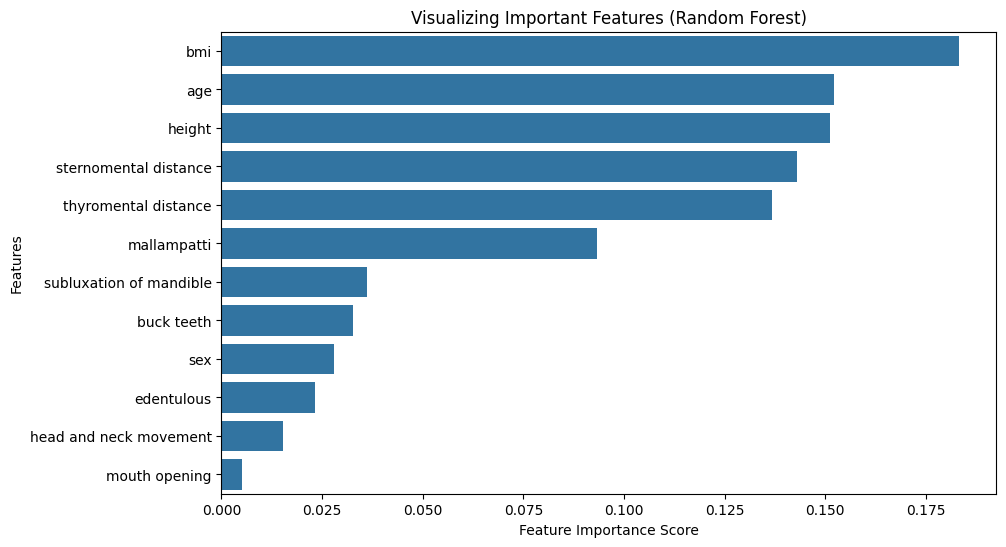

In [ ]:
# Create a Series for feature importance with corresponding feature names
feature_imp = pd.Series(rf_classifier.feature_importances_, index=X_test.columns).sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features (Random Forest)")
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(rf_classifier, X_test, y_test,
                           n_repeats=40,
                           random_state=0)



In [ ]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{dfc.columns[i]:<13}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

mallampatti  0.187 +/- 0.022
age          0.117 +/- 0.017
bmi          0.113 +/- 0.015
height       0.096 +/- 0.017
thyromental distance0.080 +/- 0.012
sternomental distance0.068 +/- 0.016
sex          0.045 +/- 0.012
buck teeth   0.029 +/- 0.011
head and neck movement0.018 +/- 0.007
edentulous   0.016 +/- 0.007
subluxation of mandible0.016 +/- 0.007


In [ ]:
# REf: https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html

def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    # `labels` argument in boxplot is deprecated in matplotlib 3.9 and has been
    # renamed to `tick_labels`. The following code handles this, but as a
    # scikit-learn user you probably can write simpler code by using `labels=...`
    # (matplotlib < 3.9) or `tick_labels=...` (matplotlib >= 3.9).
    tick_labels_parameter_name = (
        "tick_labels"
            )
    tick_labels_dict = {tick_labels_parameter_name: X.columns[perm_sorted_idx]}
    ax.boxplot(result.importances[perm_sorted_idx].T, vert=False, **tick_labels_dict)
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

<Axes: >

Text(0.5, 0, 'Gini importance')

<Axes: >

Text(0.5, 0, 'Decrease in accuracy score')

Text(0.5, 0.98, 'Impurity-based vs. permutation importances on multicollinear features (test set)')

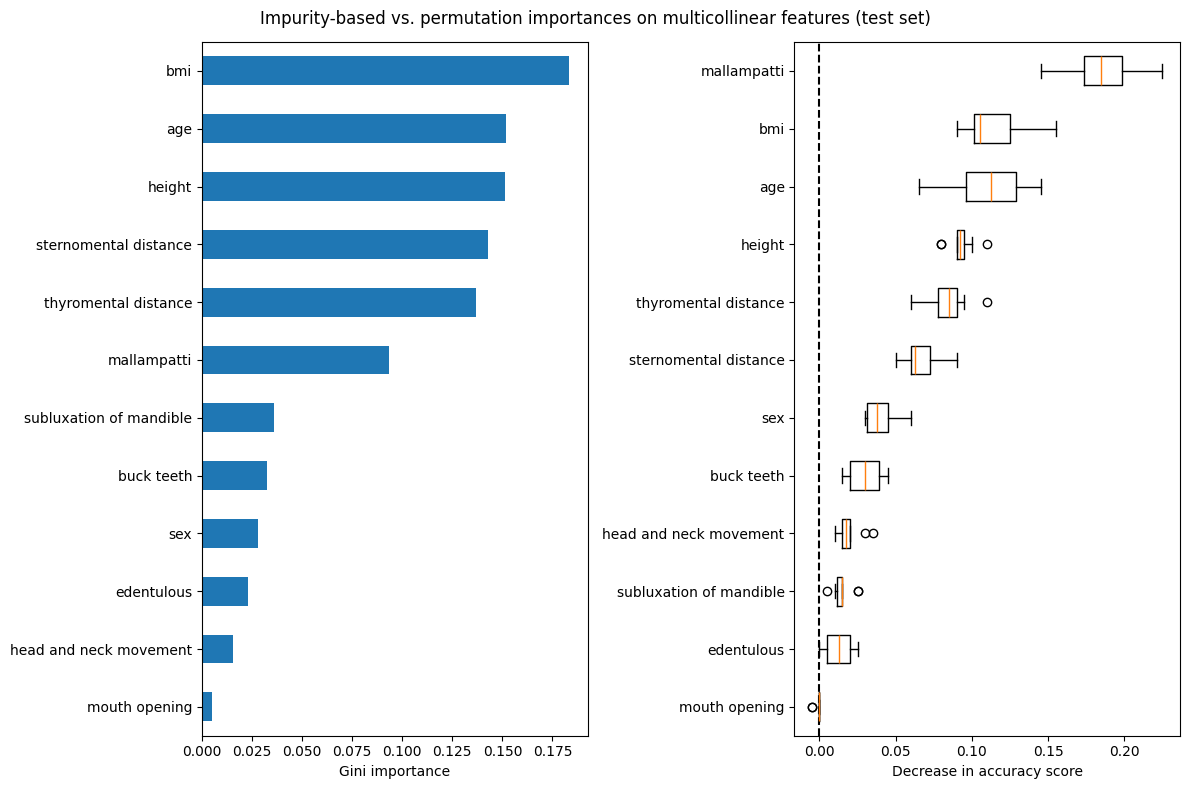

In [ ]:
mdi_importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns)
tree_importance_sorted_idx = np.argsort(rf_classifier.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(rf_classifier, X_test, y_test, ax2)
ax2.set_xlabel("Decrease in accuracy score")
fig.suptitle(
    "Impurity-based vs. permutation importances on multicollinear features (test set)"
)
_ = fig.tight_layout()

In [ ]:
# https://scikit-learn.org/stable/modules/permutation_importance.html
# https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py
from sklearn.inspection import permutation_importance
rt = permutation_importance(rf_classifier, X_train, y_train,
                           n_repeats=40,
                           random_state=0)

In [ ]:
for i in rt.importances_mean.argsort()[::-1]:
    if rt.importances_mean[i] - 2 * rt.importances_std[i] > 0:
        print(f"{df_ppd.columns[i]:<13}"
              f"{rt.importances_mean[i]:.3f}"
              f" +/- {rt.importances_std[i]:.3f}")

mallampatti  0.166 +/- 0.011
age          0.139 +/- 0.010
bmi          0.094 +/- 0.008
thyromental distance0.081 +/- 0.007
sternomental distance0.075 +/- 0.006
height       0.073 +/- 0.006
buck teeth   0.030 +/- 0.004
sex          0.014 +/- 0.003
subluxation of mandible0.009 +/- 0.003
head and neck movement0.008 +/- 0.002
edentulous   0.008 +/- 0.002


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='None', ylabel='None'>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features (Random Forest)')

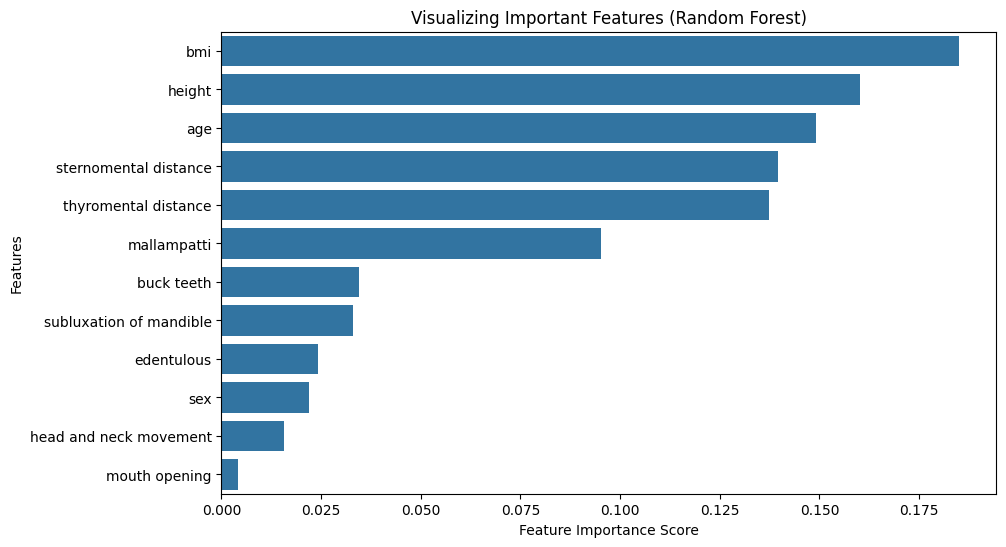

In [ ]:
# Create a Series for feature importance with corresponding feature names
feature_imp = pd.Series(rf_classifier.feature_importances_, index=X_test.columns).sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features (Random Forest)")
plt.show()

## Catboost Classifier

In [ ]:


X[cat_features].dtypes
X.shape



,0
sex,int64
buck teeth,int64
edentulous,int64
mallampatti,int64
mouth opening,int64
subluxation of mandible,int64
head and neck movement,int64


(998, 12)

In [ ]:
# Initialize and train the CatBoost Classifier
# Splitting the dataset into test & train

model = CatBoostClassifier(cat_features = cat_features )
model.fit(X_train, y_train)



In [ ]:
# Evaluate and predict
accuracy = model.score(X_test, y_test)
accuracy


np.float64(0.86)

## HistGBClassifier

In [ ]:

#categorical_features = df_cat.columns[:-1]
hist_classifier = HistGradientBoostingClassifier(max_iter=400,
                                                 min_samples_leaf = 15,
                                                 l2_regularization = 10,
                                                 categorical_features = cat_features,
                                                 learning_rate = 0.1,
                                                 #class_weight = 'balanced'
                                                 ).fit(X_train, y_train)



hist_classifier.score(X_test, y_test)


0.91

In [ ]:
scores = cross_val_score(hist_classifier, X, y, cv=5)
scores
scores.mean()

array([0.935     , 0.905     , 0.905     , 0.88944724, 0.89447236])

np.float64(0.90578391959799)

In [ ]:
from sklearn.inspection import permutation_importance
rh = permutation_importance(hist_classifier, X_test, y_test,
                           n_repeats=30,
                           random_state=0)



In [ ]:
for i in rh.importances_mean.argsort()[::-1]:
    if rh.importances_mean[i] - 2 * rh.importances_std[i] > 0:
        print(f"{df_ppd.columns[i]:<13}"
              f"{rh.importances_mean[i]:.3f}"
              f" +/- {rh.importances_std[i]:.3f}")

bmi          0.170 +/- 0.020
mallampatti  0.154 +/- 0.022
height       0.134 +/- 0.015
age          0.108 +/- 0.017
thyromental distance0.107 +/- 0.017
sternomental distance0.085 +/- 0.016
buck teeth   0.031 +/- 0.009
sex          0.026 +/- 0.009
head and neck movement0.021 +/- 0.005


In [ ]:
%%time
# prompt: For the dataset df, and target column 'cormack lahane' write code for stratified k fold with 5 splits

import pandas as pd
from sklearn.model_selection import StratifiedKFold
import time

# Assuming X and y are defined as in your previous code
# X = df_ppd.drop('cormack lahane', axis=1)
# y = df_ppd['cormack lahane']

skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=42)

hist_classifier = HistGradientBoostingClassifier(max_iter=400,
                                                 min_samples_leaf = 15,
                                                 l2_regularization = 10,
                                                 categorical_features = cat_features,
                                                 learning_rate = 0.07,
                                                 #class_weight = 'balanced'
                                                 )

start = time.time()
list_accu_stratified = []
count = 1
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print("=======")
    print("fold:", count ) ; count = count +1
    print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
    # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
    hist_classifier.fit(X_train, y_train)
    print("Accuracy:", hist_classifier.score(X_test, y_test))
    list_accu_stratified.append(hist_classifier.score(X_test, y_test))

print("========")
print("Overall Accuracy:", np.mean(list_accu_stratified))
print("========")


In [ ]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

hist_classifier = HistGradientBoostingClassifier(max_iter=200,
                                                 categorical_features = cat_features)


param_grid = {
              "learning_rate": [0.01, 0.05, 0.1, 0.15],
              "max_leaf_nodes": [7, 10, 15, 20,25,30,35, 40,45],
              "l2_regularization": [0.001,0.002,0.003,0.005,0.01, 0.02],
              "max_features" : [0.5,0.6,0.7,0.8,0.9,1]
             }

model_random_search = RandomizedSearchCV(hist_classifier,
                                       param_distributions=param_grid,
                                       n_jobs=-1,
                                       cv=5
                                       )

#model_grid_search = GridSearchCV(hist_classifier, param_grid=param_grid, n_jobs=2, cv=5)
model_random_search.fit(X_train, y_train)
hist_bst_param= model_random_search.best_params_
hist_bst_param


CPU times: user 2.21 s, sys: 178 ms, total: 2.39 s
Wall time: 48.7 s


{'max_leaf_nodes': 15,
 'max_features': 0.5,
 'learning_rate': 0.15,
 'l2_regularization': 0.002}

In [ ]:
%%time
# prompt: For the dataset df, and target column 'cormack lahane' write code for stratified k fold with 5 splits

import pandas as pd
from sklearn.model_selection import StratifiedKFold
import time

# Assuming X and y are defined as in your previous code
# X = df_ppd.drop('cormack lahane', axis=1)
# y = df_ppd['cormack lahane']

skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=42)

hist_classifier = HistGradientBoostingClassifier(max_iter=400,
                                                 max_leaf_nodes=  hist_bst_param['max_leaf_nodes'],
                                                 l2_regularization = hist_bst_param['l2_regularization'],
                                                 categorical_features = cat_features,
                                                 learning_rate = hist_bst_param['learning_rate'],
                                                 max_features = hist_bst_param['max_features'],
                                                 #class_weight = 'balanced'
                                                 )

start = time.time()
list_accu_stratified = []
count = 1
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print("=======")
    print("fold:", count ) ; count = count +1
    print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
    # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
    hist_classifier.fit(X_train, y_train)
    print("Accuracy:", hist_classifier.score(X_test, y_test))
    list_accu_stratified.append(hist_classifier.score(X_test, y_test))

print("========")
print("Overall Accuracy:", np.mean(list_accu_stratified))
print("========")


## Extratrees

### StratifiedKFold

### Repeated StratifiedKFold

In [41]:
%%time

# Ref: https://stackoverflow.com/a/66022487

clf = ExtraTreesClassifier(criterion="entropy",
                           n_estimators=400,
                           max_depth=None,
                           min_samples_split=2)

all_roc_auc = []
total_acc_list = []
count = 1
for i in range(100):
  list_accu_stratified = []
  list_roc_auc = []
  skf = StratifiedKFold(n_splits=5,
                        shuffle=True)

  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y[train_index], y[test_index]  # y is label encoded
      print("=======")
      print("fold:", count ) ; count = count +1
      print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
      print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
      # Use X_train, X_test, y_train, y_test to train/evaluate model in each fold
      clf.fit(X_train, y_train)
      acc = clf.score(X_test, y_test)
      print("Accuracy:", acc)
      list_accu_stratified.append(acc)
      auc = roc_auc_score(y_test,
                          clf.predict_proba(X_test),
                          multi_class='ovr',
                          average = None)
      print("Class-wise AUC:", auc)
      list_roc_auc.append(auc) # One-vs-rest auc

  total_acc_list.append(list_accu_stratified)
  all_roc_auc.append(list_roc_auc)


fold: 1
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.94
Class-wise AUC: [0.97139601 0.96296672 0.98046875 0.95484826]
fold: 2
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.91
Class-wise AUC: [0.96616498 0.95221185 0.93747991 0.97187269]
fold: 3
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.9
Class-wise AUC: [0.98096866 0.95875089 0.97637416 0.98630644]
fold: 4
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.9346733668341709
Class-wise AUC: [0.96722158 0.96596028 1.         1.        ]
fold: 5
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.949748743718593
Class-wise AUC: [0.99150402 0.98213554 0.98707175 1.        ]
fold: 6
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test sha

In [42]:
all_roc_auc_array = np.array(all_roc_auc)
all_roc_auc_array.shape
all_roc_auc_array.mean(axis=0).mean(axis=0)
#roc_array['extratrees'] = np.array(total_acc_list)

(100, 5, 4)

array([0.96902698, 0.96266815, 0.9746893 , 0.9922376 ])

In [51]:
res = [x for sublist in all_roc_auc for x in sublist]


500

In [52]:
roc_array['extratrees'] = res

In [53]:
roc_array.head()

,sno:,extratrees
0,0,"[0.9713960113960114, 0.9629667207792209, 0.980..."
1,1,"[0.9661649816176471, 0.9522118506493507, 0.937..."
2,2,"[0.980968660968661, 0.9587508857171778, 0.9763..."
3,3,"[0.9672215843857634, 0.9659602784602784, 1.0, ..."
4,4,"[0.9915040183696899, 0.9821355446355445, 0.987..."


In [56]:
roc_array_test=roc_array['extratrees'].explode(['class1','class2', 'class3', 'class4']).reset_index(drop=True)

In [59]:




roc_array['extratrees'].apply(pd.Series)








,0,1,2,3
0,0.971396,0.962967,0.980469,0.954848
1,0.966165,0.952212,0.937480,0.971873
2,0.980969,0.958751,0.976374,0.986306
3,0.967222,0.965960,1.000000,1.000000
4,0.991504,0.982136,0.987072,1.000000
...,...,...,...,...
495,0.980741,0.976461,0.998302,1.000000
496,0.947668,0.943131,0.964481,1.000000
497,0.964046,0.963357,0.989553,0.957809
498,0.968370,0.960381,0.974790,0.984024


In [43]:
print("========")
acc_array['ExtraTrees'] = np.array(total_acc_list).flatten()
print("Overall Accuracy:", np.mean(acc_array['ExtraTrees']))
print("Median Accuracy:", np.median(acc_array['ExtraTrees']))
print("Std deviation of accuracy:", np.std(acc_array['ExtraTrees']))
print("Class-wise avg AUC score :", all_roc_auc_array.mean(axis=0).mean(axis=0))
print("(for classes 1,2,3,4 respectively)")
print("========")

Overall Accuracy: 0.9097297487437186
Median Accuracy: 0.9095477386934674
Std deviation of accuracy: 0.02107057917152658
Class-wise avg AUC score : [0.96902698 0.96266815 0.9746893  0.9922376 ]
(for classes 1,2,3,4 respectively)


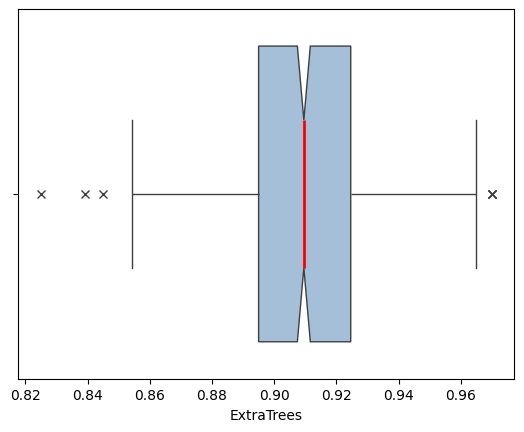

In [44]:
_=sns.boxplot(
            data=acc_array, x="ExtraTrees",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.3, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 2},
            )

### Repeated StratifiedKFold
But with [catboost encoder](https://contrib.scikit-learn.org/category_encoders/catboost.html) and alse see [here](https://contrib.scikit-learn.org/category_encoders/index.html)

In [ ]:
!pip install category_encoders -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
%%time
import category_encoders as ce
clf = ExtraTreesClassifier(criterion = "entropy",
                           n_estimators=400,
                           max_depth=None,
                           min_samples_split=2,
                           #class_weight = 'balanced',
                           #ccp_alpha = 0.0005
                           )

all_roc_auc = []
total_acc_list = []
count = 1
for i in range(100):
  list_accu_stratified = []
  list_roc_auc = []
  skf = StratifiedKFold(n_splits=5,
                        shuffle=True,
                        random_state = None
                        )
  #count = 1
  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      encoder = ce.CatBoostEncoder(cols=["sex", "edentulous",
                                         "mouth opening", "head and neck movement"]
                                   )
      encoder.fit(X_train, y_train)
      X_train = encoder.transform(X_train)
      X_test = encoder.transform(X_test)
      print("=======")
      print("fold:", count ) ; count = count +1
      print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
      print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
      # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
      clf.fit(X_train, y_train)
      print("Accuracy:", clf.score(X_test, y_test))
      list_accu_stratified.append(clf.score(X_test, y_test))
      list_roc_auc.append(roc_auc_score(y_test,
                                        clf.predict_proba(X_test),
                                        multi_class='ovr',
                                        average = None)
                         ) # One-vs-rest

  total_acc_list.append(list_accu_stratified)
  all_roc_auc.append(list_roc_auc)


fold: 1
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.925
fold: 2
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.91
fold: 3
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.885
fold: 4
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.9195979899497487
fold: 5
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.8944723618090452
fold: 6
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.92
fold: 7
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.91
fold: 8
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.915
fold: 9
X_train shape: (799, 12) y_train shape: (

In [ ]:
all_roc_auc_array = np.array(all_roc_auc)
all_roc_auc_array.shape
all_roc_auc_array.mean(axis=0).mean(axis=0)

(100, 5, 4)

array([0.96973975, 0.96252694, 0.97493553, 0.98825512])

In [ ]:
print("========")
# Accuracy results for extratrees and catboost encoded
acc_array["ExtraTrees_catboost_enc"] = np.array(total_acc_list).flatten()
# Overall accuracy with Extra Trees (catboost encoded)
print("Overall Accuracy:", np.mean(acc_array["ExtraTrees_catboost_enc"]))
print("Median Accuracy:", np.median(acc_array["ExtraTrees_catboost_enc"]))
print("Std deviation of accuracy:", np.std(acc_array["ExtraTrees_catboost_enc"]))
print("Class-wise avg AUC score :", all_roc_auc_array.mean(axis=0).mean(axis=0))
print("(for classes 0,1,2,3 respectively)")
print("========")

Overall Accuracy: 0.9092615577889446
Median Accuracy: 0.91
Std deviation of accuracy: 0.021343888893040536
Class-wise avg AUC score : [0.96973975 0.96252694 0.97493553 0.98825512]
(for classes 0,1,2,3 respectively)


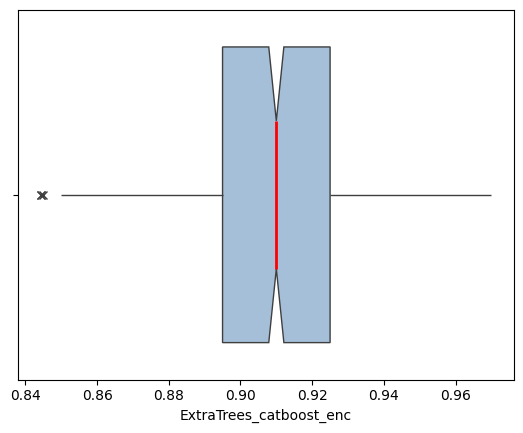

In [ ]:
_=sns.boxplot(
            data=acc_array, x="ExtraTrees_catboost_enc",
            notch=True, showcaps=False,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.3, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 2},
            )

In [ ]:
df_melted = pd.melt(acc_array[['ExtraTrees','ExtraTrees_catboost_enc']], var_name='Feature', value_name='Value')
df_melted.head()

,Feature,Value
0,ExtraTrees,0.945000
1,ExtraTrees,0.915000
2,ExtraTrees,0.905000
3,ExtraTrees,0.914573
4,ExtraTrees,0.899497


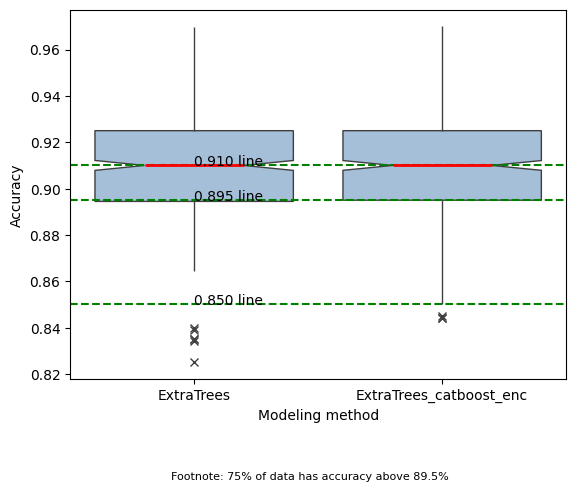

In [ ]:
# Create the boxplots
#sns.boxplot(x='Feature', y='Value', data=df_melted)
ax=sns.boxplot(
            data=df_melted, x="Feature",
            y = "Value",
            notch=True, showcaps=False,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.3, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 2},
            )
_=ax.set(xlabel='Modeling method', ylabel='Accuracy')
_=ax.axhline(y=0.85, color='g', linestyle='--')
_=ax.axhline(y=0.91, color='g', linestyle='--')
_=ax.axhline(y=0.895, color='g', linestyle='--')  # 75% obs above this line
_=ax.text(0.0,0.895, "0.895 line")
_=ax.text(0.0,0.850, "0.850 line")
_=ax.text(0.0,0.910, "0.910 line")
_=plt.figtext(0.5, -0.1, "Footnote: 75% of data has accuracy above 89.5%", ha="center", fontsize=8)


plt.show()

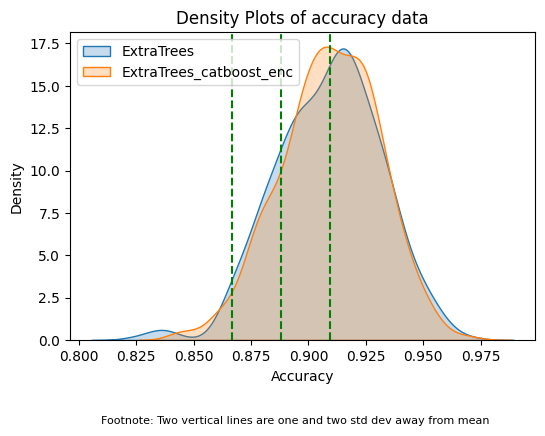

In [ ]:

# Choose the features you want to plot
features = ['ExtraTrees', 'ExtraTrees_catboost_enc']

_=plt.figure(figsize=(6,4))
for feature in features:
    _=sns.kdeplot(acc_array[feature], fill=True, label=feature)

_=plt.title('Density Plots of accuracy data')
_=plt.xlabel('Accuracy')
_=plt.ylabel('Density')
std = np.std(acc_array["ExtraTrees_catboost_enc"])
mean = np.mean(acc_array["ExtraTrees_catboost_enc"])
_=plt.axvline(x= mean - std * 1, color='g', linestyle='--')
_=plt.axvline(x= mean - std * 2, color='g', linestyle='--')
_=plt.axvline(x= mean , color='g', linestyle='--')
_=plt.figtext(0.5, -0.1, "Footnote: Two vertical lines are one and two std dev away from mean", ha="center", fontsize=8)

_=plt.legend()
_=plt.show()

### Permutation importance
ExtraTrees modeling

In [ ]:
# Splitting the dataset into test & train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
clf = ExtraTreesClassifier(n_estimators=400,
                           max_depth=None,
                           min_samples_split=2,
                           )
clf.fit(X_train, y_train)

r = permutation_importance(clf, X_test, y_test,
                           n_repeats=40,
                           random_state=0)



ExtraTreesClassifier(n_estimators=400)

In [ ]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df.columns[i]:<13}\t\t\t"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

mallampatti  			0.209 +/- 0.026
sex          			0.107 +/- 0.018
age          			0.099 +/- 0.017
thyromental distance			0.079 +/- 0.013
bmi          			0.073 +/- 0.015
height       			0.072 +/- 0.014
sternomental distance			0.059 +/- 0.013
edentulous   			0.053 +/- 0.014
buck teeth   			0.051 +/- 0.014
head and neck movement			0.049 +/- 0.010
subluxation of mandible			0.028 +/- 0.008


In [ ]:
# REf: https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html

def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    # `labels` argument in boxplot is deprecated in matplotlib 3.9 and has been
    # renamed to `tick_labels`. The following code handles this, but as a
    # scikit-learn user you probably can write simpler code by using `labels=...`
    # (matplotlib < 3.9) or `tick_labels=...` (matplotlib >= 3.9).
    tick_labels_parameter_name = (
        "tick_labels"
            )
    tick_labels_dict = {tick_labels_parameter_name: X.columns[perm_sorted_idx]}
    ax.boxplot(result.importances[perm_sorted_idx].T, vert=False, **tick_labels_dict)
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

<Axes: >

Text(0.5, 0, 'Gini importance')

<Axes: >

Text(0.5, 0, 'Decrease in accuracy score')

Text(0.5, 0.98, 'Impurity-based vs. permutation importances on multicollinear features (test set)')

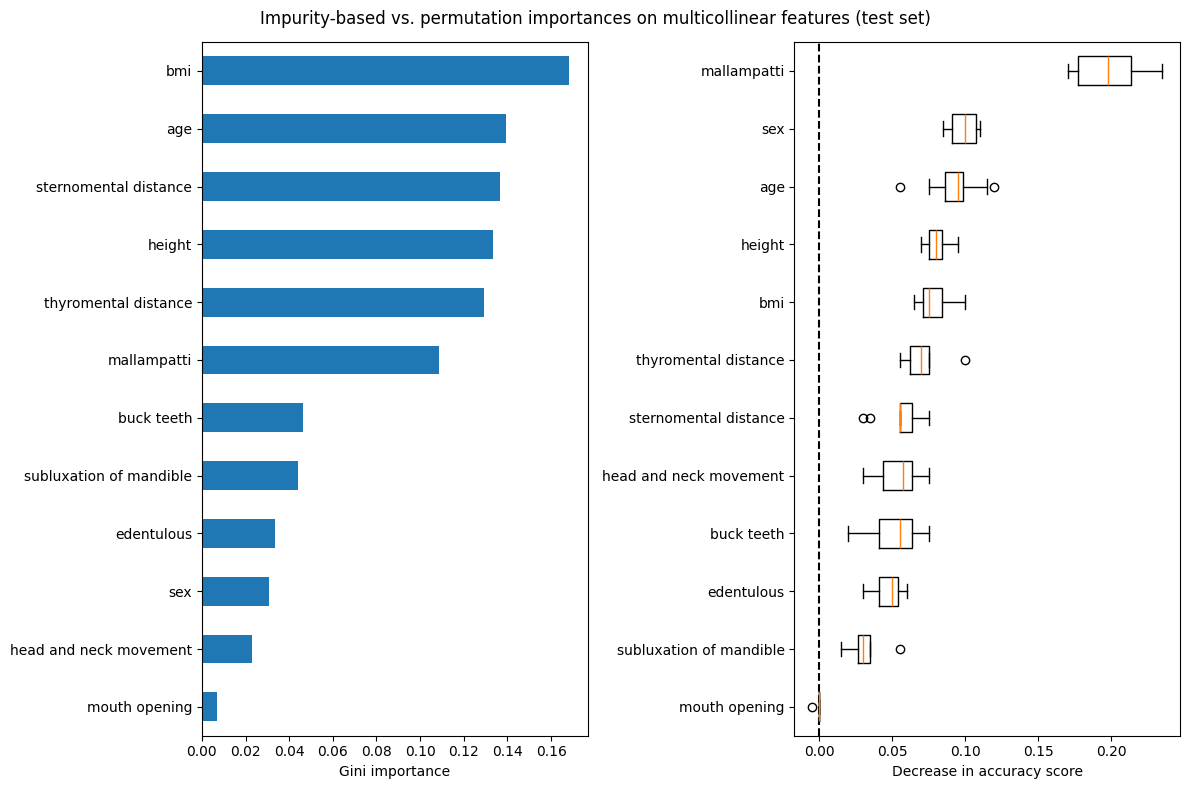

In [ ]:
mdi_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(clf, X_test, y_test, ax2)
ax2.set_xlabel("Decrease in accuracy score")
fig.suptitle(
    "Impurity-based vs. permutation importances on multicollinear features (test set)"
)
_ = fig.tight_layout()

## XGBoost classifier

In [ ]:
from xgboost import XGBClassifier
# read data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
bst = XGBClassifier(n_estimators=200,
                    max_depth=7,
                    learning_rate=0.1,
                    objective='binary:logistic',
                    enable_categorical = True)
# fit model
bst.fit(X_train, y_train)
# make predictions
xgb_preds = bst.predict(X_test)
# Calculate the accuracy of the classifier
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print("\n XGBoost:", xgb_accuracy)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


 XGBoost: 0.895


In [ ]:
y= pd.DataFrame(y, columns = ['cormack lahane'])
y= y.astype('int64')
y

In [ ]:
%%time

from xgboost import XGBClassifier

y = y.astype('int64')

# prompt: For the dataset df, and target column 'cormack lahane' write code for stratified k fold with 5 splits
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import time


#skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)


clf = XGBClassifier(tree_method="hist",
                    n_estimators=200,
                    max_depth=7,
                    learning_rate=0.1,
                    objective='binary:logistic',
                    #enable_categorical = True
                    )

total_acc_list = []
count = 1
for i in range(2):
  list_accu_stratified = []
  skf = StratifiedKFold(n_splits=5,
                        shuffle=True)
  #count = 1
  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      print("=======")
      print("fold:", count ) ; count = count +1
      print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
      print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
      # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
      clf.fit(X_train, y_train)
      print("Accuracy:", clf.score(X_test, y_test))
      list_accu_stratified.append(clf.score(X_test, y_test))
      sk = classification_report(y_test, clf.predict(X_test), output_dict = True)
      print(sk)

  total_acc_list.append(list_accu_stratified)





In [ ]:
print("========")
acc_array = np.array(total_acc_list)
acc_array.shape  # (50,5)
print("Overall Accuracy:", np.mean(acc_array))
print("Std deviation of accuracy:", np.std(acc_array))
print("========")

(2, 5)

Overall Accuracy: 0.8737638190954774
Std deviation of accuracy: 0.02618295596665781


<Axes: xlabel='accuracy'>

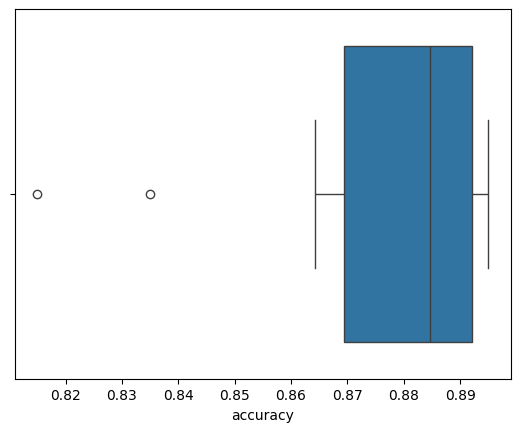

In [ ]:
acc = pd.DataFrame(acc_array.flatten(), columns = ["accuracy"])
sns.boxplot(data=acc, x="accuracy")


In [ ]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

xgb_classifier = XGBClassifier(
                      #tree_method="auto",
                    n_estimators=200,
                    objective='binary:logistic',
                    #enable_categorical = True
                    )

param_grid = {
              "booster" : ['gbtree', 'dart', 'gblinear'],
              "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2],
              "max_depth" : [3,4,5,6,7,8,9],
              "grow_policy" : ['depthwise', 'lossguide'],
              "colsample_bytree" : [0.5,0.7,0.9,1.0],
              "reg_lambda": [0.001,0.002,0.003,0.005,0.01, 0.02],
              "reg_alpha" : [0.001,0.002,0.003,0.005,0.01, 0.02],
              "gamma" : [0.001,0.002,0.003,0.005,0.01, 0.02],

             }

model_random_search = RandomizedSearchCV(xgb_classifier,
                                       param_distributions=param_grid,
                                       n_jobs=-1,
                                       cv=5
                                       )

#model_grid_search = GridSearchCV(hist_classifier, param_grid=param_grid, n_jobs=2, cv=5)
model_random_search.fit(X_train, y_train)
xgb_bst_param= model_random_search.best_params_
xgb_bst_param


CPU times: user 2.24 s, sys: 476 ms, total: 2.72 s
Wall time: 2min 45s


{'reg_lambda': 0.001,
 'reg_alpha': 0.001,
 'max_depth': 8,
 'learning_rate': 0.2,
 'grow_policy': 'depthwise',
 'gamma': 0.001,
 'colsample_bytree': 0.5,
 'booster': 'gbtree'}

In [ ]:
%%time
# prompt: For the dataset df, and target column 'cormack lahane' write code for stratified k fold with 5 splits

import pandas as pd
from sklearn.model_selection import StratifiedKFold
import time

# Assuming X and y are defined as in your previous code
# X = df_ppd.drop('cormack lahane', axis=1)
# y = df_ppd['cormack lahane']

skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=42)

xgb_clf = XGBClassifier(booster = xgb_bst_param['booster'],
                        max_depth = xgb_bst_param['max_depth'],
                        n_estimators=200,
                        grow_policy = xgb_bst_param['grow_policy'],
                        colsample_bytree = xgb_bst_param['colsample_bytree'],
                        reg_lambda = xgb_bst_param['reg_lambda'],
                        reg_alpha = xgb_bst_param['reg_alpha'],
                        gamma =xgb_bst_param['gamma'],
                        learning_rate= xgb_bst_param['learning_rate'],
                        objective='binary:logistic',
                        #enable_categorical = True
                        )


start = time.time()
list_accu_stratified = []
count = 1
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print("=======")
    print("fold:", count ) ; count = count +1
    print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
    # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
    hist_classifier.fit(X_train, y_train)
    print("Accuracy:", hist_classifier.score(X_test, y_test))
    list_accu_stratified.append(hist_classifier.score(X_test, y_test))

print("========")
print("Overall Accuracy:", np.mean(list_accu_stratified))
print("========")


## Voting classifier

In [ ]:
%%time

from sklearn.ensemble import  VotingClassifier



xgb_clf = XGBClassifier(booster = xgb_bst_param['booster'],
                        max_depth = xgb_bst_param['max_depth'],
                        n_estimators=200,
                        grow_policy = xgb_bst_param['grow_policy'],
                        colsample_bytree = xgb_bst_param['colsample_bytree'],
                        reg_lambda = xgb_bst_param['reg_lambda'],
                        reg_alpha = xgb_bst_param['reg_alpha'],
                        gamma =xgb_bst_param['gamma'],
                        learning_rate= xgb_bst_param['learning_rate'],
                        objective='binary:logistic',
                        #enable_categorical = True
                        )

extra_clf = ExtraTreesClassifier(n_estimators=150,
                           max_depth=None,
                           min_samples_split=2,
                           class_weight = 'balanced',
                           ccp_alpha = 0.0005)

hist_classifier = hist_classifier = HistGradientBoostingClassifier(max_iter=400,
                                                 max_leaf_nodes=  hist_bst_param['max_leaf_nodes'],
                                                 l2_regularization = hist_bst_param['l2_regularization'],
                                                 categorical_features = cat_features,
                                                 learning_rate = hist_bst_param['learning_rate'],
                                                 max_features = hist_bst_param['max_features'],
                                                 #class_weight = 'balanced'
                                                 )

#rf_classifier = RandomForestClassifier(n_estimators=400)


eclf = VotingClassifier(estimators=[('xgb', xgb_clf),
                                    ('hist', hist_classifier),
                                    ('extra', extra_clf),
                                    #('rf', rf_classifier)
                                    ],
                         voting='soft')



total_acc_list = []
total_class0  = []
total_class1 = []
total_class2 = []
total_class3 = []
count = 1
for i in range(50):
  print("=========")
  print("ITERATION", i)
  print("=========")

  list_accu_stratified = []
  class0  = []    # [['precision', 'recall', 'f1-score', 'support'] ....]
  class1 = []
  class2 = []
  class3 = []
  skf = StratifiedKFold(n_splits=5,
                        shuffle=True)

  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      print("=======")
      print("fold:", count ) ; count = count +1
      print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
      print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
      # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
      eclf.fit(X_train, y_train)
      print("Accuracy:", eclf.score(X_test, y_test))
      list_accu_stratified.append(eclf.score(X_test, y_test))
      sk = classification_report(y_test, eclf.predict(X_test), output_dict = True)
      class0.append(list(sk['0'].values()))  # [['precision', 'recall', 'f1-score', 'support']...]
      class1.append(list(sk['1'].values()))
      class2.append(list(sk['2'].values()))
      class3.append(list(sk['3'].values()))

  total_acc_list.append(list_accu_stratified)
  total_class0.append(class0)
  total_class1.append(class1)
  total_class2.append(class2)
  total_class3.append(class3)



ITERATION 0
fold: 1
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.88
fold: 2
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.885
fold: 3
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.9
fold: 4
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.8894472361809045
fold: 5
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.8844221105527639
ITERATION 1
fold: 6
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.865
fold: 7
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.9
fold: 8
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.905
fold: 9
X_train shape: (799

In [ ]:
total_acc_list
#IIndattempt = total_acc_list

In [ ]:
Istattempt

In [ ]:
print("========")
acc_array = np.array(total_acc_list)
acc_array.shape  # (50,5)
print("Overall Accuracy:", np.mean(acc_array))
print("Std deviation of accuracy:", np.std(acc_array))
print("========")

(50, 5)

Overall Accuracy: 0.8895020100502513
Std deviation of accuracy: 0.02200677592610861


<Axes: xlabel='accuracy'>

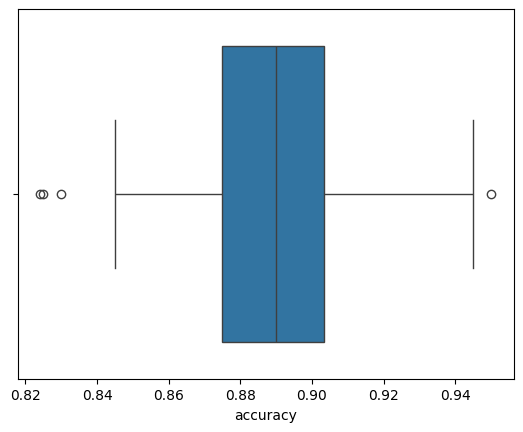

In [ ]:
acc = pd.DataFrame(acc_array.flatten(), columns = ["accuracy"])
sns.boxplot(data=acc, x="accuracy")


<Axes: xlabel='accuracy', ylabel='Density'>

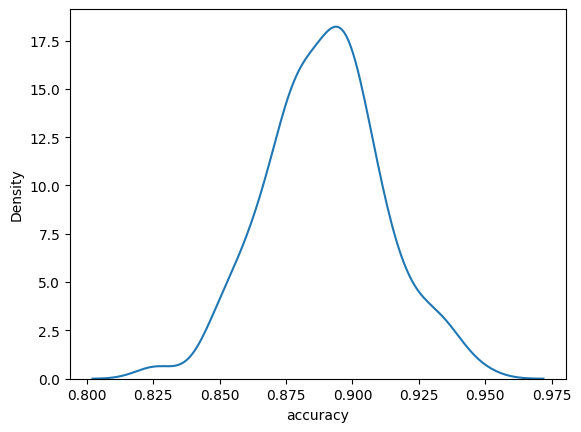

In [ ]:
sns.kdeplot(data=acc, x="accuracy")

In [ ]:
###########

In [ ]:
%%time

from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

#y = y.astype('int64')

xgb_clf = XGBClassifier(tree_method="hist",
                        n_estimators=200,
                        max_depth=7,
                        learning_rate=0.1,
                        objective='binary:logistic',
                        #enable_categorical = True
                        )

extra_clf = ExtraTreesClassifier(n_estimators=150,
                           max_depth=None,
                           min_samples_split=2,
                           class_weight = 'balanced',
                           ccp_alpha = 0.0005)

hist_classifier = hist_classifier = HistGradientBoostingClassifier(max_iter=400,
                                                 max_leaf_nodes=  bst_param['max_leaf_nodes'],
                                                 l2_regularization = bst_param['l2_regularization'],
                                                 categorical_features = cat_features,
                                                 learning_rate = bst_param['learning_rate'],
                                                 max_features = bst_param['max_features'],
                                                 #class_weight = 'balanced'
                                                 )

rf_classifier = RandomForestClassifier(n_estimators=300)

extra_clf1 = ExtraTreesClassifier(n_estimators=350,
                                  max_depth=None,
                                  min_samples_split=2,
                                  class_weight = 'balanced',
                                  ccp_alpha = 0.0005
                                  )


sclf = StackingClassifier(estimators=[('xgb', xgb_clf),
                                      ('hist', hist_classifier),
                                       ('extra', extra_clf)],
                         final_estimator= extra_clf1,
                         n_jobs = -1,
                         passthrough = True,
                         cv = 5,
                         stack_method = 'predict_proba')

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)
sclf.fit(X_train, y_train)

print(classification_report(y_test,
                      sclf.predict(X_test),
                      output_dict = True
                      ))

print("Accuracy:", sclf.score(X_test, y_test))


{'0': {'precision': 0.8470588235294118, 'recall': 0.935064935064935, 'f1-score': 0.8888888888888888, 'support': 77.0}, '1': {'precision': 0.8951048951048951, 'recall': 0.9142857142857143, 'f1-score': 0.9045936395759717, 'support': 140.0}, '2': {'precision': 1.0, 'recall': 0.6666666666666666, 'f1-score': 0.8, 'support': 24.0}, '3': {'precision': 1.0, 'recall': 0.6666666666666666, 'f1-score': 0.8, 'support': 9.0}, 'accuracy': 0.888, 'macro avg': {'precision': 0.9355409296585767, 'recall': 0.7956709956709956, 'f1-score': 0.8483706321162152, 'support': 250.0}, 'weighted avg': {'precision': 0.8941528589058, 'recall': 0.888, 'f1-score': 0.8859502159403219, 'support': 250.0}}
Accuracy: 0.888
CPU times: user 1.49 s, sys: 42.5 ms, total: 1.54 s
Wall time: 25.3 s


In [ ]:

%%time

#y= pd.DataFrame(y, columns = ['cormack lahane'])
#y.head()

# prompt: For the dataset df, and target column 'cormack lahane' write code for stratified k fold with 5 splits
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import time


#skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)


clf = XGBClassifier(tree_method="hist",
                    n_estimators=200,
                    max_depth=7,
                    learning_rate=0.1,
                    objective='binary:logistic',
                    enable_categorical = True)

total_acc_list = []
total_class0  = []
total_class1 = []
total_class2 = []
total_class3 = []
count = 1
for i in range(3):
  list_accu_stratified = []
  class0  = []
  class1 = []
  class2 = []
  class3 = []
  skf = StratifiedKFold(n_splits=5,
                        shuffle=True)
  #count = 1
  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      print("=======")
      print("fold:", count ) ; count = count +1
      print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
      print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
      # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
      clf.fit(X_train, y_train)
      print("Accuracy:", clf.score(X_test, y_test))
      list_accu_stratified.append(clf.score(X_test, y_test))
      sk = classification_report(y_test, clf.predict(X_test), output_dict = True)
      class0.append(list(sk['0'].values()))   # ['precision', 'recall', 'f1-score', 'support']
      class1.append(list(sk['1'].values()))
      class2.append(list(sk['2'].values()))
      class3.append(list(sk['3'].values()))


  total_acc_list.append(list_accu_stratified)
  total_class0.append(class0)
  total_class1.append(class1)
  total_class2.append(class2)
  total_class3.append(class3)





In [ ]:
###############